# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Tyler/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv('untitled.env')
api_key = os.getenv("API")
type(api_key)

str

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)

In [22]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q='bitcoin',
                                          language='en')

bitcoin_headlines
#Had to use get_everything becuase of the lack of data

{'status': 'ok',
 'totalResults': 12570,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'https://www.engadget.com/about/editors/saqib-shah',
   'title': 'El Salvador becomes the first country to approve Bitcoin as legal currency',
   'description': 'El Salvador has voted to adopt Bitcoin as legal tender..',
   'url': 'https://www.engadget.com/el-salvador-bitcoin-legal-tender-120440725.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-06/84c12d30-c919-11eb-a6ff-cedcc0c31aae',
   'publishedAt': '2021-06-09T12:04:40Z',
   'content': "El Salvador's President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country's congress voted to accept the cryptocurrency by a majori… [+1414 chars]"},
  {'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'Matt Novak',
   'title': 'El Salvador Becomes First Country to Recognize Bitcoin as Currency',
   'description': 'El Salvador

In [20]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q='Ethereum',
                                          language='en')
ethereum_headlines
#Had to use get_everything becuase of the lack of data

{'status': 'ok',
 'totalResults': 3748,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Connie Loizos',
   'title': 'Solana, a blockchain platform followed by top crypto investors, says it’s a lot faster than Ethereum',
   'description': 'Solana isn’t known yet outside of the crypto community. But insiders think the blockchain platform is interesting for a wide variety of reasons, beginning with its amiable founder, Anatoly Yakovenko, who spent more than a dozen years as an engineer working on…',
   'url': 'http://techcrunch.com/2021/05/14/solana-a-blockchain-platform-followed-by-top-crypto-investors-says-its-a-lot-faster-than-ethereum/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/05/Screen-Shot-2021-05-14-at-6.41.59-PM.png?w=539',
   'publishedAt': '2021-05-15T01:49:36Z',
   'content': 'Solana isn’t known yet outside of the crypto community. But insiders think the blockchain platform is interesting for a wide variety of reasons,

In [23]:
# Create the Bitcoin sentiment scores DataFrame
def create_df(news):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]
            

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)


In [24]:
bitcoin_df = create_df(bitcoin_headlines['articles'])

In [25]:
bitcoin_df.head()

,title,description,text,date
0,El Salvador becomes the first country to appro...,El Salvador has voted to adopt Bitcoin as lega...,El Salvador's President Nayib Bukele has made ...,2021-06-09
1,El Salvador Becomes First Country to Recognize...,El Salvador has become the first country in th...,El Salvador has become the first country in th...,2021-06-09
2,Coinbase is down amid massive cryptocurrency p...,Cryptocurrency exchange Coinbase is experienci...,Illustration by Alex Castro / The Verge\r\n\n ...,2021-05-19
3,Elon Musk Tweets—and Crypto Markets Show Their...,The Tesla and SpaceX billionaire has sent Doge...,"Last week, whenElon Musk tweeted that he had s...",2021-05-17
4,Elon Musk says Tesla will resume Bitcoin purch...,"It's all about clean energy, it seems. \nElon ...","It's all about clean energy, it seems. \r\nElo...",2021-06-14


In [26]:
def get_sentiment(score):
    
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result


title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in bitcoin_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass
    
    
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
bitcoin_df = bitcoin_df.join(title_sentiment_df).join(text_sentiment_df)

bitcoin_df.head()


,title,description,text,date,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,El Salvador becomes the first country to appro...,El Salvador has voted to adopt Bitcoin as lega...,El Salvador's President Nayib Bukele has made ...,2021-06-09,0.1280,0.120,0.880,0.000,1,0.8402,0.282,0.718,0.0,1
1,El Salvador Becomes First Country to Recognize...,El Salvador has become the first country in th...,El Salvador has become the first country in th...,2021-06-09,0.0000,0.000,1.000,0.000,0,0.1280,0.043,0.957,0.0,1
2,Coinbase is down amid massive cryptocurrency p...,Cryptocurrency exchange Coinbase is experienci...,Illustration by Alex Castro / The Verge\r\n\n ...,2021-05-19,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.0,0
3,Elon Musk Tweets—and Crypto Markets Show Their...,The Tesla and SpaceX billionaire has sent Doge...,"Last week, whenElon Musk tweeted that he had s...",2021-05-17,-0.2732,0.148,0.609,0.243,-1,0.4754,0.075,0.925,0.0,1
4,Elon Musk says Tesla will resume Bitcoin purch...,"It's all about clean energy, it seems. \nElon ...","It's all about clean energy, it seems. \r\nElo...",2021-06-14,0.0000,0.000,1.000,0.000,0,0.6908,0.169,0.831,0.0,1


In [27]:
ethereum_df = create_df(ethereum_headlines['articles'])
ethereum_df.head()

,title,description,text,date
0,"Solana, a blockchain platform followed by top ...",Solana isn’t known yet outside of the crypto c...,Solana isn’t known yet outside of the crypto c...,2021-05-15
1,Bitcoin crashes as investors fear crypto bull ...,"Bitcoin, Ethereum and a host of Altcoins suffe...","Bitcoin, Ethereum and a host of Altcoins suffe...",2021-05-19
2,Ethereum's 27-year-old founder says we're in a...,Vitalik Buterin is the 27-year-old co-founder ...,,2021-05-20
3,Ethereum extends gains to rise 8%; bitcoin fir...,Cryptocurrency Ethereum extended gains to rise...,A representation of virtual currency Ethereum ...,2021-05-31
4,Most new NVIDIA RTX gaming GPUs will be crypto...,NVIDIA is extending its limits on GPU capacity...,GPU shortages and inflated prices have become ...,2021-05-19


In [28]:
# Create the Ethereum sentiment scores DataFrame
ethereum_df = create_df(ethereum_headlines['articles'])


def get_sentiment(score):
    
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result


title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in ethereum_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass
    
    
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
ethereum_df = ethereum_df.join(title_sentiment_df).join(text_sentiment_df)

ethereum_df.head()

,title,description,text,date,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,"Solana, a blockchain platform followed by top ...",Solana isn’t known yet outside of the crypto c...,Solana isn’t known yet outside of the crypto c...,2021-05-15,0.2023,0.122,0.878,0.000,1,0.5499,0.106,0.894,0.000,1
1,Bitcoin crashes as investors fear crypto bull ...,"Bitcoin, Ethereum and a host of Altcoins suffe...","Bitcoin, Ethereum and a host of Altcoins suffe...",2021-05-19,-0.4939,0.000,0.789,0.211,-1,-0.2023,0.066,0.847,0.087,-1
2,Ethereum's 27-year-old founder says we're in a...,Vitalik Buterin is the 27-year-old co-founder ...,,2021-05-20,0.0000,0.000,1.000,0.000,0,0.0000,0.000,0.000,0.000,0
3,Ethereum extends gains to rise 8%; bitcoin fir...,Cryptocurrency Ethereum extended gains to rise...,A representation of virtual currency Ethereum ...,2021-05-31,0.4404,0.358,0.642,0.000,1,0.0000,0.000,1.000,0.000,0
4,Most new NVIDIA RTX gaming GPUs will be crypto...,NVIDIA is extending its limits on GPU capacity...,GPU shortages and inflated prices have become ...,2021-05-19,0.0000,0.000,1.000,0.000,0,-0.3612,0.067,0.801,0.132,-1


In [29]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.095405,0.037450,0.879100,0.083450,-0.200000,0.142260,0.070900,0.890300,0.038800,0.250000
std,0.279700,0.081826,0.135935,0.120733,0.695852,0.486007,0.079343,0.075306,0.053869,0.910465
min,-0.599400,0.000000,0.609000,0.000000,-1.000000,-0.762700,0.000000,0.718000,0.000000,-1.000000
25%,-0.295200,0.000000,0.777000,0.000000,-1.000000,-0.220025,0.000000,0.844000,0.000000,-1.000000
50%,0.000000,0.000000,0.940000,0.000000,0.000000,0.189000,0.063000,0.893500,0.000000,1.000000
75%,0.000000,0.000000,1.000000,0.212750,0.000000,0.560725,0.118750,0.938500,0.075000,1.000000
max,0.599400,0.281000,1.000000,0.316000,1.000000,0.840200,0.282000,1.000000,0.180000,1.000000


In [30]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.005730,0.058600,0.878150,0.063250,0.050000,-0.041220,0.043150,0.856250,0.050550,-0.050000
std,0.278024,0.101505,0.133573,0.094083,0.686333,0.392891,0.057794,0.220476,0.077423,0.825578
min,-0.493900,0.000000,0.642000,0.000000,-1.000000,-0.868900,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.766250,0.000000,0.000000,-0.345300,0.000000,0.809250,0.000000,-1.000000
50%,0.000000,0.000000,0.939000,0.000000,0.000000,0.000000,0.000000,0.914500,0.000000,0.000000
75%,0.038275,0.126000,1.000000,0.136500,0.250000,0.146575,0.067250,1.000000,0.081750,1.000000
max,0.541300,0.358000,1.000000,0.242000,1.000000,0.670500,0.188000,1.000000,0.286000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin.

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [74]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from collections import Counter
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/Tyler/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [81]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords

bit_string = bitcoin_df['text'].str.cat(sep='')


In [76]:
# Complete the tokenizer function
def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    tokens = [word.lower() for word in words if word.lower() not in sw]
    
    return tokens

In [77]:
# Create a new tokens column for Bitcoin
bitcoin_tokens = tokenizer(bit_string)

#bitcoin_tokens[:5]

def word_counter(tokens):
    top_10 = dict(Counter(tokens).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [78]:
word_counter(bitcoin_tokens)

,word,count
0,bitcoin,12
1,crypto,9
2,cryptocurrency,8
3,week,8
4,us,5
5,exchange,4
6,coinbase,4
7,musk,4
8,president,3
9,become,3


In [101]:
# Create a new tokens column for Ethereum
eth_string = ethereum_df['text'].str.cat(sep='')

def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    tokens = [word.lower() for word in words if word.lower() not in sw]
    
    return tokens

ethereum_tokens = tokenizer(eth_string)

def word_counter(tokens):
    top_10 = dict(Counter(tokens).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

word_counter(ethereum_tokens)

,word,count
0,week,6
1,crypto,5
2,ethereum,5
3,may,4
4,blockchain,3
5,market,3
6,cryptocurrency,3
7,charsthis,3
8,norton,3
9,march,3


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [84]:
from collections import Counter
from nltk import ngrams

In [86]:
# Generate the Bitcoin N-grams where N=2
def bigram_counter(text): 
    bigrams = ngrams(text, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

bigram_counter(bitcoin_tokens)

,bigram,count
0,"(president, nayib)",2
1,"(nayib, bukele)",2
2,"(bitcoin, legal)",2
3,"(salvador, become)",2
4,"(become, first)",2
5,"(first, country)",2
6,"(country, world)",2
7,"(cryptocurrency, exchange)",2
8,"(outage, morning)",2
9,"(elon, musk)",2


In [87]:
# Generate the Ethereum N-grams where N=2
def bigram_counter(text): 
    bigrams = ngrams(text, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

bigram_counter(ethereum_tokens)

,bigram,count
0,"(charsbitcoin, ethereum)",2
1,"(virtual, currency)",2
2,"(illustration, taken)",2
3,"(charsthis, article)",2
4,"(article, translated)",2
5,"(translated, spanish)",2
6,"(spanish, edition)",2
7,"(edition, using)",2
8,"(using, ai)",2
9,"(ai, technologies)",2


In [ ]:
# Function token_count generates the top 10 words for a given coin

## I have that above.

#def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [88]:
# Use token_count to get the top 10 words for Bitcoin
def word_counter(tokens):
    top_10 = dict(Counter(tokens).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

word_counter(bitcoin_tokens)


,word,count
0,bitcoin,12
1,crypto,9
2,cryptocurrency,8
3,week,8
4,us,5
5,exchange,4
6,coinbase,4
7,musk,4
8,president,3
9,become,3


In [90]:
# Use token_count to get the top 10 words for Ethereum
def word_counter(tokens):
    top_10 = dict(Counter(tokens).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

word_counter(ethereum_tokens)

,word,count
0,week,6
1,crypto,5
2,ethereum,5
3,may,4
4,blockchain,3
5,market,3
6,cryptocurrency,3
7,charsthis,3
8,norton,3
9,march,3


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

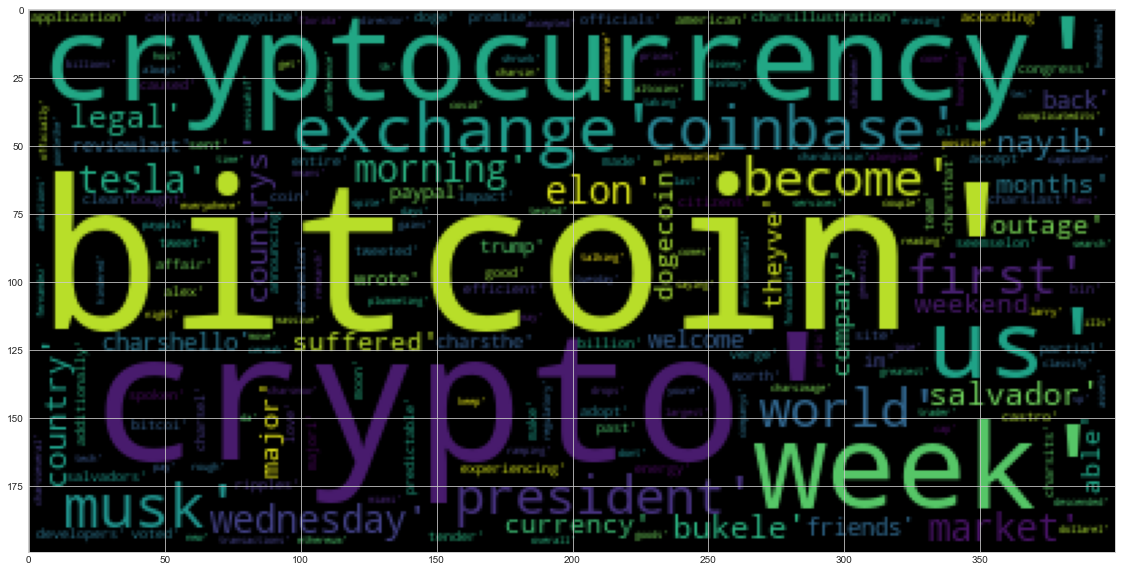

In [110]:
# Generate the Bitcoin word cloud
def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    tokens = [word.lower() for word in words if word.lower() not in sw]
    
    return tokens

bitcoin_tokens = tokenizer(bit_string)
bitcoin_tokens_string = str(bitcoin_tokens)

wc = WordCloud().generate(bitcoin_tokens_string)
plt.imshow(wc)

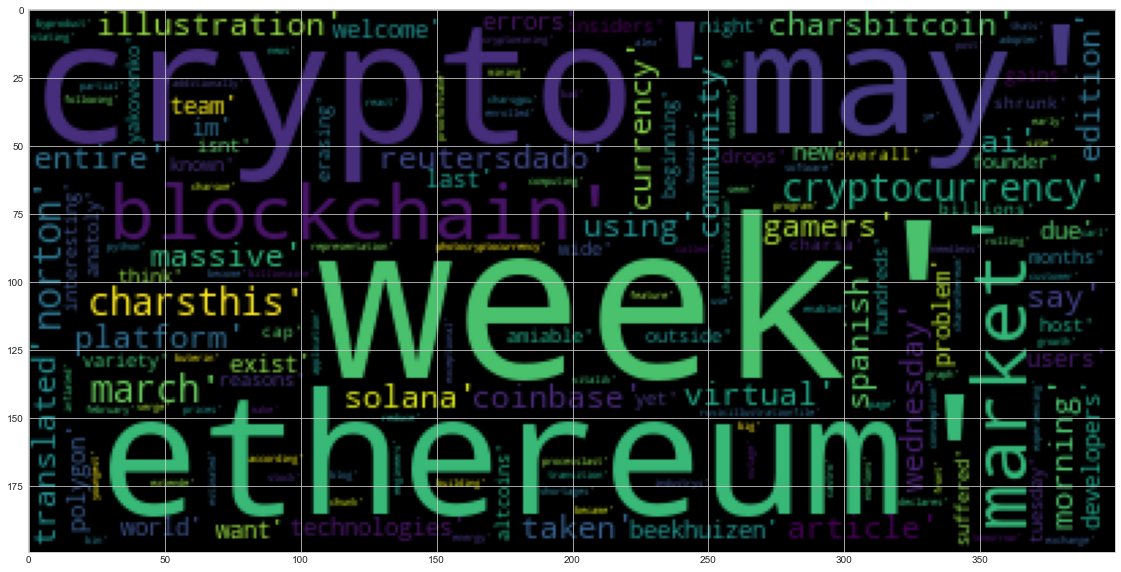

In [111]:
# Generate the Ethereum word cloud
def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    tokens = [word.lower() for word in words if word.lower() not in sw]
    
    return tokens

ethereum_tokens = tokenizer(eth_string)
ethereum_tokens_string = str(ethereum_tokens)

wc = WordCloud().generate(ethereum_tokens_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [116]:
import spacy
from spacy import displacy

In [114]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.7 MB 9.7 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [117]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [124]:
# Concatenate all of the Bitcoin text together
doc = nlp(bit_string)
doc.user_data["title"] = "Bitcoin NER"

In [125]:
# Run the NER processor on all of the text
displacy.render(doc, style='ent')


In [127]:
# List all Entities
entities = [ent.text for ent in doc.ents]
entities

["El Salvador's",
 'Nayib Bukele',
 'Central American',
 'Salvador',
 'first',
 'Nayib Bukele',
 'Wednesday',
 'Citizens',
 'Alex Castro',
 'The Verge\r\n\n \n\n Cryptocurrency',
 'Coinbase',
 'this morning',
 'Coinbase',
 'Bin',
 '+1307 chars]Last week',
 'Musk',
 'Dogecoin',
 'Elon Musk',
 'Tesla',
 'the past few months',
 'first',
 'Tesla',
 '$1.5 billion',
 'Elon Musk',
 'Bitcoin',
 'Bitcoin',
 'Ethereum',
 'Altcoins',
 'Tuesday night',
 'Wednesday',
 'morning',
 'months',
 'hundreds of billions',
 'hours-long',
 'this morning',
 'May 19th',
 'US',
 'El Salvador',
 'first',
 'Bitcoin',
 'Miami',
 'Florida',
 'last weekend',
 'covid-19',
 'Larry Cermak',
 'Last week',
 'Disney',
 'This week',
 'Tec',
 'PayPals',
 'Wednesday',
 'Jose Fernandez da Pontethe',
 'more than 5,500 miles',
 'the United States',
 'Mary-Ann RussonBusiness',
 'BBC News',
 'US',
 'Donald Trump',
 'Fox Business',
 'Bitcoin',
 'US',
 'Photo',
 'Michele Doying',
 'Verge',
 'Iran',
 'Last week',
 'Trump',
 'This we

---

### Ethereum NER

In [128]:
# Concatenate all of the Ethereum text together
doc = nlp(eth_string)
doc.user_data["title"] = "Ethereum NER"

In [129]:
# Render the visualization
displacy.render(doc, style='ent')

In [131]:
# List all Entities
entities = [ent.text for ent in doc.ents]
entities

['Solana',
 'Anatoly Yakovenko',
 'Ethereum',
 'Altcoins',
 'Tuesday night',
 'Wednesday',
 'morning',
 'months',
 'hundreds of billions',
 'Ethereum',
 'February 19, 2021',
 'Alex Castro',
 'The Verge\r\n\n \n\n Cryptocurrency',
 'Coinbase',
 'this morning',
 'Coinbase',
 'Bin',
 'Spanish',
 'AI',
 'Last May',
 'Buterin',
 '27',
 '99.95%',
 'Carl Beekhuizen',
 'the Ethereum Foundation',
 'Beekhuizen',
 'tomorrow',
 'Norton',
 'Norton',
 'Norton Crypto',
 'chars]"We',
 'Bitcoin',
 'U.S. Dollar',
 'May 26, 2020',
 'Dado Ruvic/File PhotoBitcoin',
 'last week',
 'one-day',
 'March last year',
 'Wednesday',
 '$1 trillion',
 'Entrepreneur',
 'March 2021',
 'more than one million',
 'SafeMoon',
 'decades',
 'Ill',
 'Jacks',
 'CriddleTechnology',
 'Kim Catdarshian',
 'Ethereum',
 'Spanish',
 'AI',
 'This week',
 'March 2020',
 'Ferdman/Getty Images',
 'Mark Cuban',
 'Ethereum',
 'Polygon',
 'Polygon',
 'tEhereum',
 'Last week',
 'Trump',
 'This week',
 'Elon Musk’s']

---